In [1]:
import time
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def measure_runtime(command):
    start_time = time.time()
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    end_time = time.time()
    runtime = end_time - start_time
    return runtime, result.stdout, result.stderr

In [3]:
input_files = [
    ("./Chow_Rep1.genes.results", "./Chow_Rep2.genes.results"),
    ("./Chow_Rep2.genes.results", "./Chow_Rep3.genes.results"),
    ("./Chow_Rep3.genes.results", "./Chow_Rep1.genes.results"),
    ("./HFD_Rep1.genes.results", "./HFD_Rep2.genes.results"),
    ("./HFD_Rep2.genes.results", "./HFD_Rep3.genes.results"),
    ("./HFD_Rep3.genes.results", "./HFD_Rep1.genes.results")
]

In [4]:
commands = {
    "scatter_plot": "quantgene scatter {file1} {file2} ./",
    "convert_fpkm_to_tpm": "quantgene convert {file1} ./"
}


In [5]:
def calculate_average_runtime(commands, file_pairs):
    runtimes = []
    for file1, file2 in file_pairs:
        command = commands.format(file1=file1, file2=file2)
        print(f"Measuring runtime for files: {file1}, {file2}")
        runtime, stdout, stderr = measure_runtime(command)
        if stderr:
            print(f"Errors for files {file1}, {file2}:\n{stderr}")
        else:
            runtimes.append(runtime)
    average_runtime = np.mean(runtimes)
    return average_runtime, runtimes

In [6]:
average_runtimes = {}
all_runtimes = {}

for name, command in commands.items():
    print(f"Calculating average runtime for {name}...")
    avg_runtime, runtimes = calculate_average_runtime(command, input_files)
    average_runtimes[name] = avg_runtime
    all_runtimes[name] = runtimes
    print(f"Average runtime for {name}: {avg_runtime:.2f} seconds")

Calculating average runtime for scatter_plot...
Measuring runtime for files: ./Chow_Rep1.genes.results, ./Chow_Rep2.genes.results
Measuring runtime for files: ./Chow_Rep2.genes.results, ./Chow_Rep3.genes.results
Measuring runtime for files: ./Chow_Rep3.genes.results, ./Chow_Rep1.genes.results
Measuring runtime for files: ./HFD_Rep1.genes.results, ./HFD_Rep2.genes.results
Measuring runtime for files: ./HFD_Rep2.genes.results, ./HFD_Rep3.genes.results
Measuring runtime for files: ./HFD_Rep3.genes.results, ./HFD_Rep1.genes.results
Average runtime for scatter_plot: 3.84 seconds
Calculating average runtime for convert_fpkm_to_tpm...
Measuring runtime for files: ./Chow_Rep1.genes.results, ./Chow_Rep2.genes.results
Measuring runtime for files: ./Chow_Rep2.genes.results, ./Chow_Rep3.genes.results
Measuring runtime for files: ./Chow_Rep3.genes.results, ./Chow_Rep1.genes.results
Measuring runtime for files: ./HFD_Rep1.genes.results, ./HFD_Rep2.genes.results
Measuring runtime for files: ./HFD_Rep

In [7]:
average_runtime_df = pd.DataFrame(list(average_runtimes.items()), columns=['Task', 'Average Runtime'])

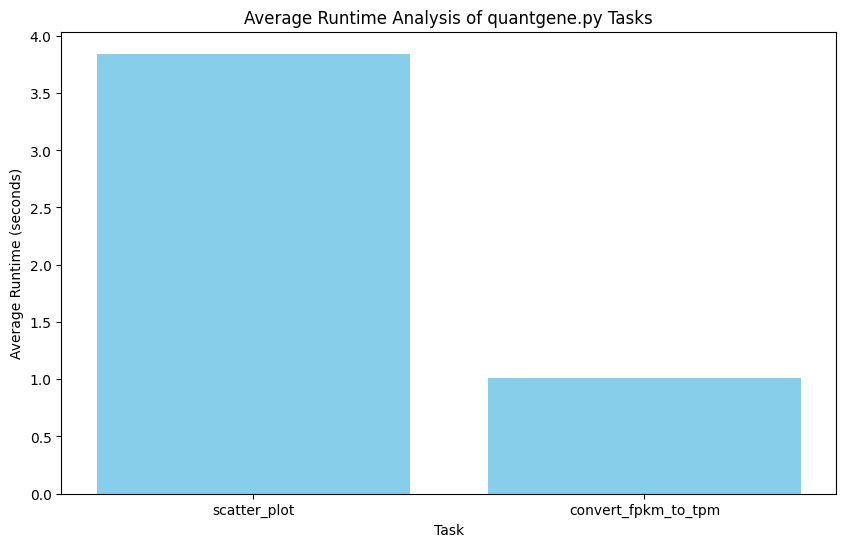

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(average_runtime_df['Task'], average_runtime_df['Average Runtime'], color='skyblue')
plt.xlabel('Task')
plt.ylabel('Average Runtime (seconds)')
plt.title('Average Runtime Analysis of quantgene.py Tasks')
plt.show()

In [10]:
average_runtime_df

,Task,Average Runtime
0,scatter_plot,3.844907
1,convert_fpkm_to_tpm,1.009124


In [ ]:
average_runtime_df